<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST2312/blob/main/CST2312_Class07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CST2312 - Class #07, follow-up on reading files in Google Colab
by Professor Patrick, 27-Sep-2021    


updated on 23-Feb-2022


This notebook works with a Github repository in ProfessorPatrickSlatraigh/CST2312. 

That repository includes the files "mbox-short.txt" and "mbox.txt". 
The repo can be cloned to be used in Google Colab as a resource or a URL for a file in the Github repo, or Google Drive can be used to open a Python handle for a file which will persist beyond the current Colab session.  Before working with the file in Github or Google Drive, the first section of this notebook describes how local files can be uploaded to a Colab session. Files which are uploaded as resources to the content area of Colab do not persist after the Colab notebook is closed.



Here is the mbox-short.txt file as a reference: https://www.py4e.com/code3/mbox-short.txt , which is a shortened version of the file: https://www.py4e.com/code3/mbox.txt .  Both files are text files which contain a series of email messages.  The files are used as references in exercises in the Charles Severance book Python for Everybody (py4e.com).



---



## QuickGuide to Colab Session Files

Take a moment to familiaize yourself with the different approaches to accessing files using Google Colab.

*Note that file access from other platforms (Jupyter notebook on machine/virtual machine, Cloud, etc.) will have different approaches to accessing files.  Regardless, Python will use a `file handle` variable to work with a file once it has been attached and opened.*

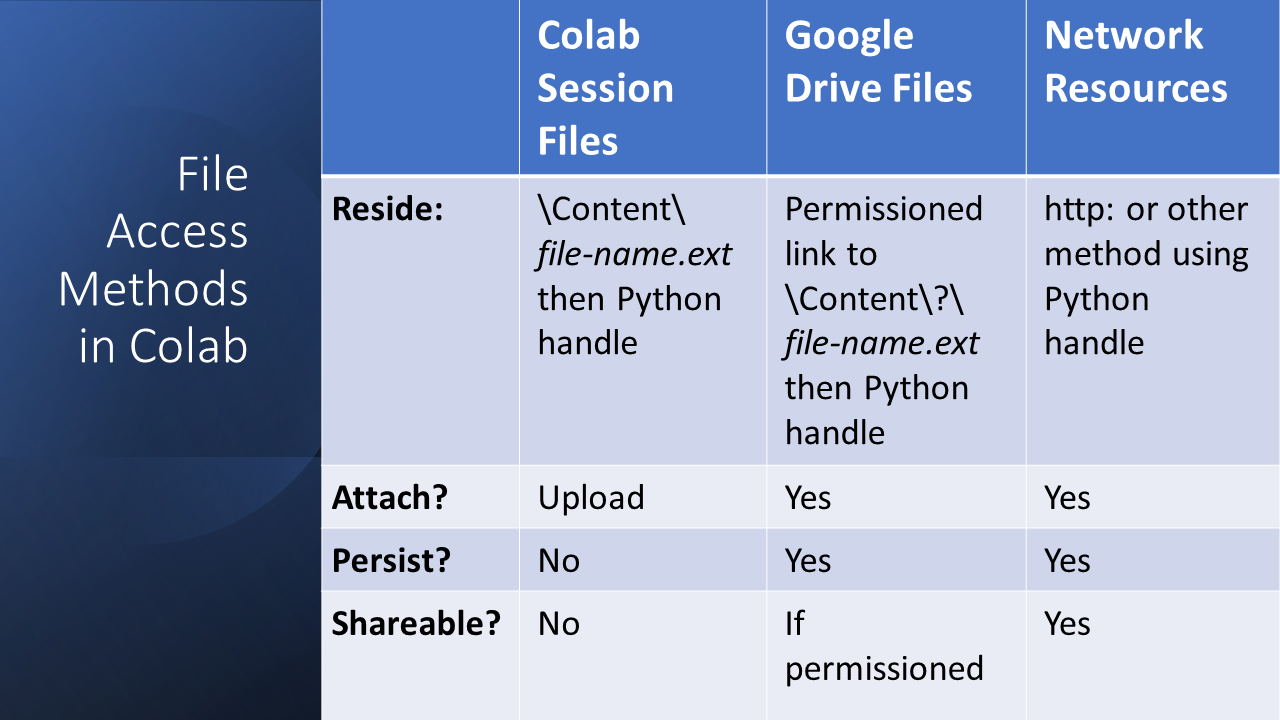



---



## Preparing the Environment    


Import required libraries/modules

The following code snippet imports pandas which is needed for the file loading processes from Github and Googe Drive (gdrive) which are described at the bottom of this notebook.

In [ ]:
# let's import pandas as pd so that we have it available
import pandas as pd




---



## **UPLOADING TO COLAB EVERY TIME**

The first example reads "mbox-short.txt" from the Google Colab content folder "sample_data".  In order to do that, the "mbox-short.txt" file needs to be uploaded to the "sample_data" folder.  That upload is temporary for the Google Colab session - the "mbox-short.txt" file will go away after you finish with your active Colab notebook.  Note that this method does not require pandas.


Use the panel on the left of your Colab session to navigate to the content area and the "sample_data" folder.  Then use the three vertical dots to the right of the name "sample_data" to choose 'Upload' and navigate to the "mbox-short.txt" file on your computer.


Use the three vertical dots to your uploaded "mbox_short.txt" file in the "sample_data" content folder to choose "Copy path" and that will put the full path (URL) in your clipboard.  If the path is not the same as in the following call to the open() command then replace the string for the file name with the URL from your clipboard - paste it in as the argument to open().

In [ ]:
colab_handle = open("/content/sample_data/mbox-short.txt")

Now you can use the print function to see the attributes of the new colab_handle you created to the "mbox-short.txt" file in the content folder "sample_data" on Google Colab.


In [ ]:
print(colab_handle)

<_io.TextIOWrapper name='/content/sample_data/mbox-short.txt' mode='r' encoding='UTF-8'>


You can use a for loop to print the contents of "mbox_short.txt"

In [ ]:
for line in colab_handle :
    print(line)


# **READING FILES FROM GITHUB**

Now let's try reading the same file from a Github repository (repo).  We will use the CST2312 repo in the ProfessorPatrickSlatraigh account on Github.  The file "mbox-short.txt" was uploaded to that repo.  

From Github we navigated to the "mbox-short.txt" file and viewed it in it's raw format using the "raw" button to the right of the file name.  While in raw viewing mode in a browser, we copied the URL from the browser to the clipboard.  Please note that this works with open repos, not private repos.


In [ ]:
git_handle = pd.read_fwf("https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/CST2312/main/mbox-short.txt")

In [ ]:
print(git_handle)

Storing files in Github gives us persistence.  That is, when we are done with our Google Colab session the files on Github remain and can be used again.  And our Google Colab notebooks should work each time we open them without the need for use to upload files to the content area on Google Colab for every session.

# **READING FILES FROM GOOGLE DRIVE**

We can also have persistent files stored in Google Drive.  To read files from Google Drive we will need to import the drive module from google.colab.  We will also need to have Google Drive give stream access to Google Colab.  If the files are on a different Google Drive account from the Google Colab account then be sure to have permission of the Google Drive owner for access to the file.

You can use the drive module from google.colab to mount your entire Google Drive to Colab by:

1. Executing the below code which will provide you with an authentication link

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


2. Open the link

3. Choose the Google account whose Drive you want to mount

4. Allow Google Drive Stream access to your Google Account

5. Copy the code displayed, paste it in the text box as shown below, and press Enter

Once the Drive is mounted, you’ll get the message “Mounted at /content/gdrive”, and you’ll be able to browse through the contents of your Drive from the file-explorer pane.

You can even write directly to Google Drive from Colab using the usual file/directory operations.

In [ ]:
!touch "/content/gdrive/My Drive/sample_file.txt"

This will create a file in your Google Drive, and will be visible in the file-explorer pane once you refresh it.  Notice that the path within the content area is different from the "sample_data" folder we used earlier for fles uploaded directly to Google Colab.  The content area will have a "gdrive" folder after you have authenticated with Google Drive.  Within the "gdrive" folder there should be a folder structure according to your Google Drive folders.

If your Google Drive folder had the file "mbox-short.txt" within the "My Drive" folder then you would be able to open that file with the following code:

In [ ]:
gdrive_handle = open("/content/gdrive/My Drive/mbox-short.txt")

Now you can use the print function to see the attributes of the new gdrive_handle you created to the "mbox-short.txt" file in the content folder "gdrive/My Drive/" on Google Drive.


In [ ]:
print(gdrive_handle)

<_io.TextIOWrapper name='/content/gdrive/My Drive/mbox-short.txt' mode='r' encoding='UTF-8'>


As in the earlier Google Colab example, you can now use a for loop to print the contents of "mbox_short.txt" in Google Drive

In [ ]:
for line in gdrive_handle :
    print(line)


# **Reading Pastebin and Other HTTP with GET**

This section reads the "mail-short.txt" file from a Pastebin posting using the RAW format in Pastebin and the HTTP GET from the request module.  The source file is online at: https://pastebin.com/raw/ADPQe6BM 

First import the request module as rq

In [ ]:
import requests as rq

The use the GET command to read the RAW text file on Pastebin

In [ ]:
http_handle = rq.get('https://pastebin.com/raw/ADPQe6BM')
list_of_lines = http_handle.text.splitlines()

Print the response to check that the HTTP request worked

In [ ]:
print(http_handle)

<Response [200]>


And print the result

In [ ]:
for line in list_of_lines:
    print(line)

A file object has a lot of attributes. 

You can see a list of all methods and attributes of the file object here: 

https://docs.python.org/2.4/lib/bltin-file-objects.html. 

Following are some of the most used file object methods −

*   **close()** - Close the file.

*   **next()** - When a file is used as an iterator, typically in a for loop (for example, for line in f: print line), the next() method is called repeatedly. This method returns the next input line, or raises StopIteration when EOF is hit.

*   **read([size])** - Read at most size bytes from the file.

*   **readline([size])** - Read one entire line from the file.

*   **seek(offset[, whence])** - Set the file's current position, like stdio's fseek(). The whence argument is optional and defaults to 0 (absolute file positioning); other values are 1 (seek relative to the current position) and 2 (seek relative to the file's end).

*   **tell()** - Return the file's current position, like stdio's ftell().

*   **write(str)** - Write a string to the file.

*   **writelines(sequence)** - Write a sequence of strings to the file.


Following are file object's most used attributes −

*   **closed** - bool indicating the current state of the file object.

*   **encoding** - The encoding that this file uses.

*   **mode**- The I/O mode for the file.

*   **name** - If the file object was created using open(), the name of the file. Otherwise, some string that indicates the source of the file object



---



*With thanks to this reference article:  
Neptune.ai blogs - How to Deal with Files in Google Colab: Everything You Need to Know, https://neptune.ai/blog/google-colab-dealing-with-files-2*

---

